In [4]:
from stereo3d import stereo_read_from_pickle as std_read
from parsivel import pars_read_from_pickle as pars_read
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
import numpy as np 
from pathlib import Path
pars_folder = Path("/home/marcio/stage_project/data/saved_events/pars_events")
stereo_folder = Path("/home/marcio/stage_project/data/saved_events/stereo_events")

# Read all the data and extract one event

#### Select event from Stereo 3D

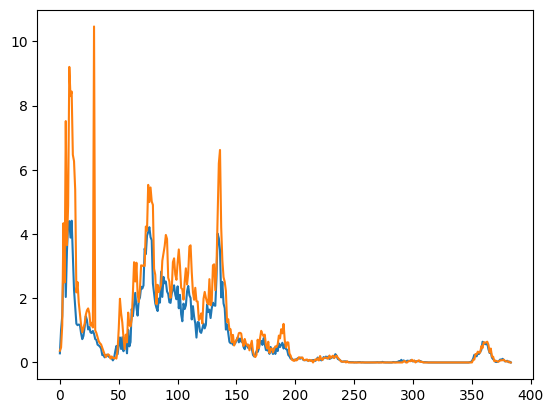

In [5]:
stereo_event = std_read(next(stereo_folder.iterdir()))
pars_event = pars_read(next(pars_folder.iterdir()))
figure, ax = plt.subplots()
ax.plot(stereo_event.rain_rate())
ax.plot(pars_event.rain_rate)

# Split the stereo 3d event into multiple areas

In [6]:
stereo_sections = stereo_event.split_by_distance_to_sensor()
sessions_numbers = list(range(1, len(stereo_sections) + 1))

# Plotting The main indicators of 

In [7]:
def plot_by_event(figures_by_session, mean_pars, mean_stereo, ax: Axes):
    ytop = max((max(figures_by_session), mean_pars, mean_stereo))
    ax.scatter(sessions_numbers, figures_by_session, label = "value_by_section")
    ax.set_xlabel("sections")
    ax.hlines(mean_stereo,1,8, linestyles='--', label= "stereo3d_average")
    ax.hlines(mean_pars,1,8,colors='orange', linestyles='--' , label= "parsivel_average")
    ax.set_xbound(0.5,8.5)
    ax.set_ybound(0,1.05*ytop)

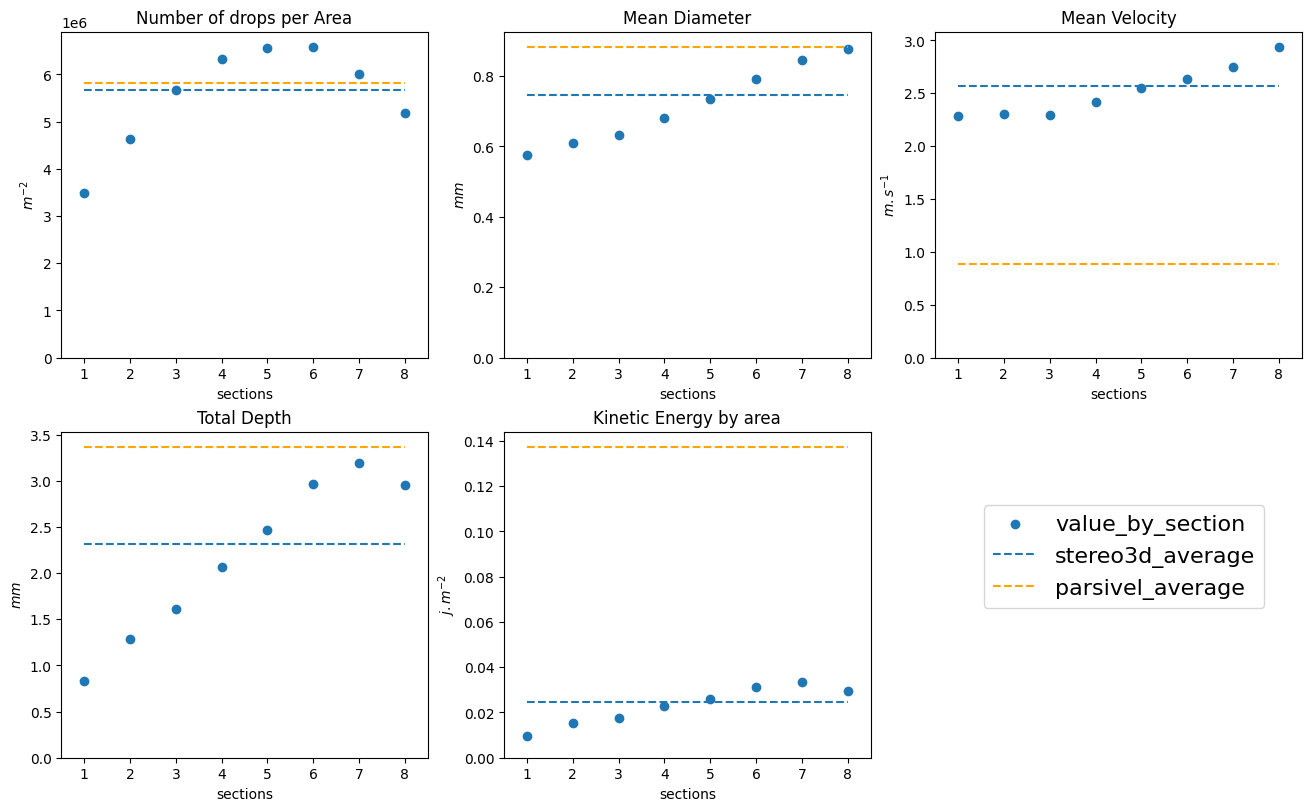

In [12]:
number_indicators = 5
ncols = 3
nrows = int(np.ceil(number_indicators / ncols))
counter = 1

figure = plt.figure()
figure.set_size_inches(13,nrows*4)
figure.set_constrained_layout(True)

# Number of drops per Area
ax = figure.add_subplot(nrows, ncols, counter)
indicator = [section.npa_event for section in stereo_sections]
pars_mean = pars_event.npa_for_event
stereo_mean = stereo_event.npa_event
plot_by_event(indicator,pars_mean, stereo_mean, ax)
ax.set_title("Number of drops per Area")
ax.set_ylabel("$m^{-2}$")
counter += 1

# Mean Diameter
ax = figure.add_subplot(nrows, ncols, counter)
indicator = [section.mean_diameter for section in stereo_sections]
pars_mean = pars_event.mean_diameter_for_event
stereo_mean = stereo_event.mean_diameter
plot_by_event(indicator,pars_mean, stereo_mean, ax)
ax.set_title("Mean Diameter")
ax.set_ylabel("$mm$")
counter += 1

# Mean Velocity
ax = figure.add_subplot(nrows, ncols, counter)
indicator = [section.mean_velocity for section in stereo_sections]
pars_mean = pars_event.mean_diameter_for_event
stereo_mean = stereo_event.mean_velocity
plot_by_event(indicator,pars_mean, stereo_mean, ax)
ax.set_title("Mean Velocity")
ax.set_ylabel("$m.s^{-1}$")
counter += 1

# Total depth
ax = figure.add_subplot(nrows, ncols, counter)
indicator = [section.total_depth_for_event for section in stereo_sections]
pars_mean = pars_event.total_depth_for_event
stereo_mean = stereo_event.total_depth_for_event
plot_by_event(indicator,pars_mean, stereo_mean, ax)
ax.set_title("Total Depth")
ax.set_ylabel("$mm$")
counter += 1

# Kinetic energy
ax = figure.add_subplot(nrows, ncols, counter)
indicator = [section.kinetic_energy_flow for section in stereo_sections]
pars_mean = pars_event.kinetic_energy_flow_for_event
stereo_mean = stereo_event.kinetic_energy_flow
plot_by_event(indicator,pars_mean, stereo_mean, ax)
ax.set_title("Kinetic Energy by area")
ax.set_ylabel("$j.m^{-2}$")
counter += 1

handles, labels = ax.get_legend_handles_labels()
figure.legend(handles, labels, loc=(0.75,0.25), fontsize=16)

In [13]:
from aux_funcs.general import V_D_Lhermitte_1988
from sklearn.metrics import r2_score
lnx = np.linspace(0,4,100)
lny = V_D_Lhermitte_1988(lnx)

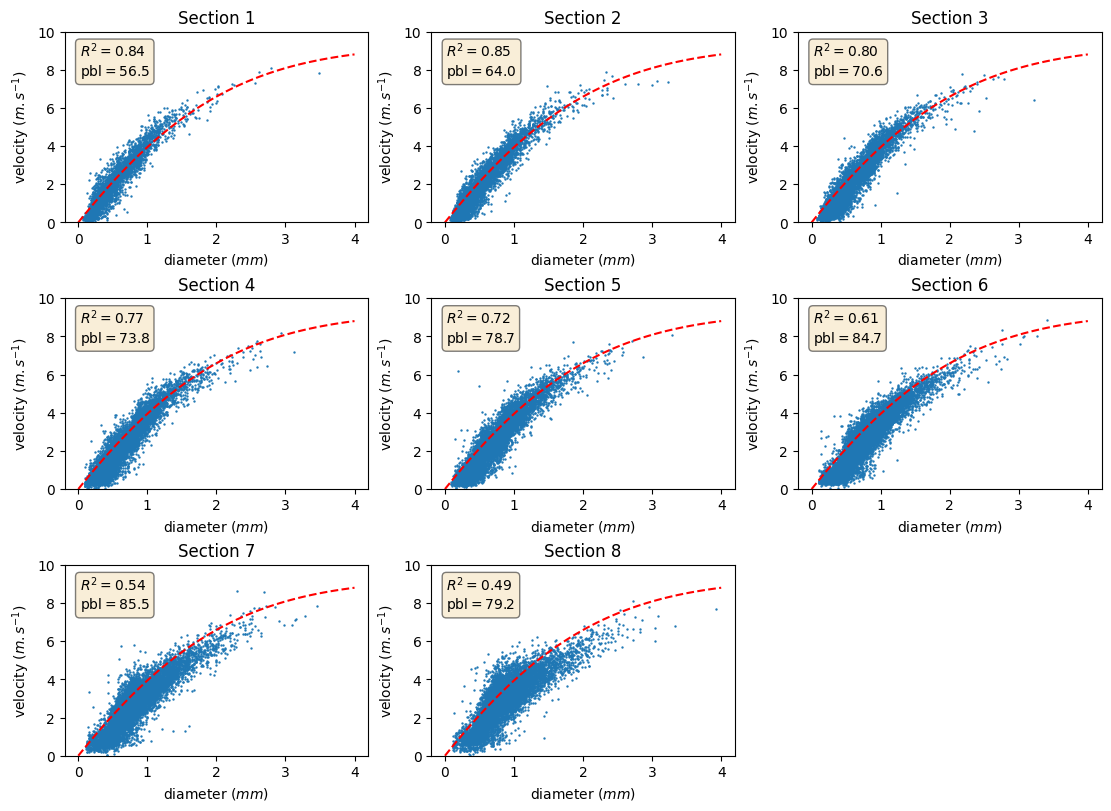

In [19]:
figure = plt.figure()
figure.set_size_inches((11, 8))
figure.set_constrained_layout(True)
for i, session in enumerate(stereo_sections):
    ax = figure.add_subplot(3,3, i + 1)
    ax.scatter(session.diameters, session.velocity, marker=".", s=2.0,)

    r2 = r2_score(V_D_Lhermitte_1988(session.diameters), session.velocity)
    percentage_bellow = sum(1 for item in session if V_D_Lhermitte_1988(item.diameter) > item.velocity) / len(session) *100
    textstr = '\n'.join((
        r'$R^{2}=%.2f$' % (r2, ),
        r'pbl$=%.1f$' % (percentage_bellow, )))

    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
    ax.set_xlabel("diameter $(mm)$")
    ax.set_ylabel("velocity $(m.s^{-1})$")
    
    ax.set_title(f"Section {i+ 1}")
    ax.plot(lnx, lny, 'r--')
    ax.set_ybound(0,10)